## Breast Cancer - Binary Classification

Predicting whether a tumor is **Malignant (0)** or **Benign (1)** using three classification algorithms:

1- Logistic Regression

2- SVM (Support Vector Machine) 

3- KNN (K-Nearest Neighbors)

### Data Load and understanding

In [93]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data 
y = data.target

In [94]:
X.shape

(569, 30)

In [95]:
y.shape

(569,)

In [96]:
import pandas as pd

# Quick overview as a DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [97]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Split Data

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## 1- Logistic Regression

### Model Training

In [102]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=100)
log_model.fit(X_train, y_train)

print("Model Trained successfully")

Model Trained successfully


c:\Users\hamee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Prediction

In [103]:
y_pred_log = log_model.predict(X_test)

### Evaluation

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Logistic Regression Results:\n")

print("LR Accuracy:", accuracy_score(y_test, y_pred_log)) 

print("LR Precision:", precision_score(y_test, y_pred_log))

print("LR Recall:", recall_score(y_test, y_pred_log))

print("LR F1-score:", f1_score(y_test, y_pred_log))

print("LR Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Results:

LR Accuracy: 0.956140350877193
LR Precision: 0.9466666666666667
LR Recall: 0.9861111111111112
LR F1-score: 0.9659863945578231
LR Confusion Matrix:
 [[38  4]
 [ 1 71]]


## 2- SVM

### Model Training

In [ ]:
from sklearn.svm import SVC

# svm_model = SVC(max_iter=100) # Based on distance no need for iteration

svm_model = SVC
svm_model.fit(X_train, y_train)

print("Model Trained successfully")

Model Trained successfully


### Prediction

In [107]:
y_pred_svm = svm_model.predict(X_test)

### Evaluation

In [116]:
print("SVM Results\n")

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Precision:", precision_score(y_test, y_pred_svm))
print("SVM Recall:", recall_score(y_test, y_pred_svm))
print("SVM F1-score:", f1_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Results

SVM Accuracy: 0.9298245614035088
SVM Precision: 0.9210526315789473
SVM Recall: 0.9722222222222222
SVM F1-score: 0.9459459459459459
SVM Confusion Matrix:
 [[36  6]
 [ 2 70]]


## 3- KNN

### Model Training

In [117]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

print("Model Trained successfully")

Model Trained successfully


### Prediction

In [118]:
y_pred_knn = knn_model.predict(X_test)

### Evaluation

In [119]:
print("KNN Results:")

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

print("KNN Precision:", precision_score(y_test, y_pred_knn))

print("KNN Recall:", recall_score(y_test, y_pred_knn))

print("KNN F1-score:", f1_score(y_test, y_pred_knn))

print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Results:
KNN Accuracy: 0.9122807017543859
KNN Precision: 0.9428571428571428
KNN Recall: 0.9166666666666666
KNN F1-score: 0.9295774647887324
KNN Confusion Matrix:
 [[38  4]
 [ 6 66]]


## 4- Model Comparison Table

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


results = {
    "Model": ["Logistic Regression", "SVM", "KNN"],
    
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_knn)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_knn)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_knn)
    ]
}

comparison_df = pd.DataFrame(results)

comparison_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.956140,0.946667,0.986111,0.965986
1,SVM,0.929825,0.921053,0.972222,0.945946
2,KNN,0.912281,0.942857,0.916667,0.929577


## 5-Confusion Matrices

From the confusion matrices, **Logistic Regression** shows the best overall performance. It has the lowest number of false negatives (1 case) and fewer total errors compared to SVM and KNN.

In a medical context, minimizing false negatives is critical because missing a malignant tumor can delay treatment and threaten a patient’s life. Therefore, **Logistic Regression** is the most suitable model for this task.

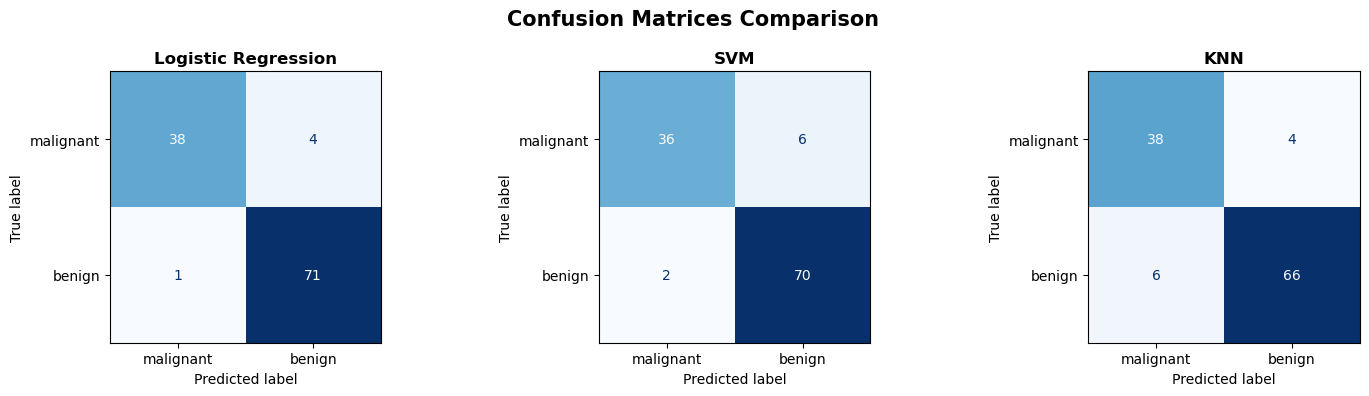

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#List of predictions for each model

models = [
    ("Logistic Regression", y_pred_log),
    ("SVM", y_pred_svm),
    ("KNN", y_pred_knn)
]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle("Confusion Matrices Comparison", fontsize=15, fontweight="bold")

for ax, (name, y_pred) in zip(axes, models):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=data.target_names)
    disp.plot(ax=ax, colorbar=False, cmap="Blues")
    ax.set_title(name, fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

## 6-Metric Bar Chart

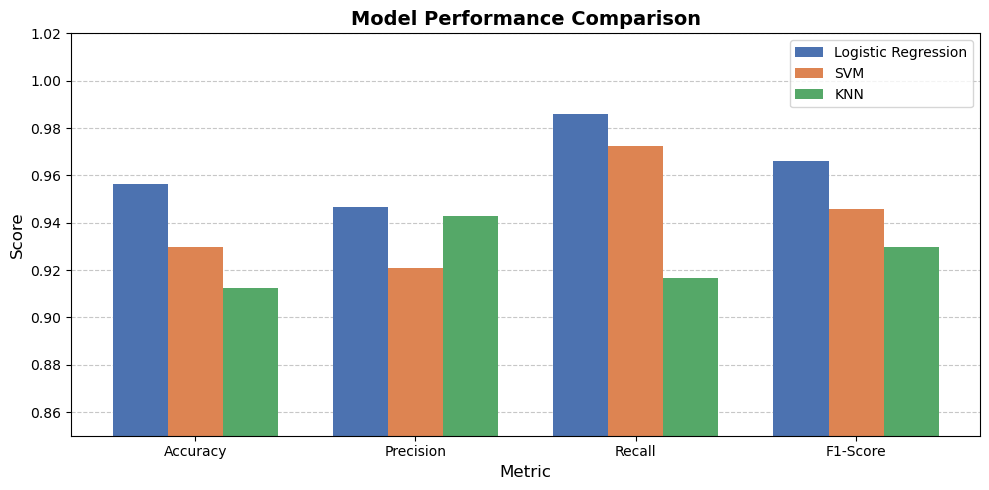

In [126]:
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = np.arange(len(metrics))
width = 0.25
colors = ["#4C72B0", "#DD8452", "#55A868"]

fig, ax = plt.subplots(figsize=(10, 5))

for i, row in comparison_df.iterrows():
    ax.bar(
        x + i * width,
        [row[m] for m in metrics],
        width,
        label=row["Model"],
        color=colors[i]
    )

ax.set_xlabel("Metric", fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=14, fontweight="bold")

ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.set_ylim(0.85, 1.02)

ax.legend()
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)

plt.tight_layout()

plt.show()


## 7. Conclusion

### Comparison Summary

| Model               | Accuracy | Precision | Recall | F1-Score |
|---------------------|----------|-----------|--------|----------|
| Logistic Regression | 0.9561   | 0.9466    | 0.9861 | 0.9659   |
| SVM                 | 0.9298   | 0.9210    | 0.9722 | 0.9459   |
| KNN                 | 0.9122   | 0.9428    | 0.9166 | 0.9295   |

### Which model performed best?

**Logistic Regression** achieved the highest scores across all four metrics
* accuracy (95.61%)
* precision (94.66%)
* recall (98.61%)
* F1-score (96.59%)

It outperformed both SVM and KNN despite the absence of feature scaling.

Logistic Regression is robust to feature magnitude differences through its optimization process, whereas SVM and KNN are distance-based algorithms that suffer more acutely without scaling.

### Most important metric in a medical context

In a cancer screening context, **Recall (Sensitivity)** is the most critical metric.

Recall measures the proportion of actual positive cases (malignant tumors) that the model correctly identifies. A **false negative** (predicting a malignant tumor as benign), means a patient with cancer goes undiagnosed and untreated, which can be life-threatening. Missing a true cancer case is far more dangerous than a false alarm (false positive), which would simply lead to further confirmatory tests.

For this reason we want to **minimize false negatives at all costs**, making Recall the primary optimization target in medical diagnostic tasks.

Logistic Regression leads on this metric with a recall of **98.61%**, making it the recommended model for this task.
